In [2]:
import ensaio
import harmonica as hm
import xarray as xr
import verde as vd
import numpy as np
import xrft

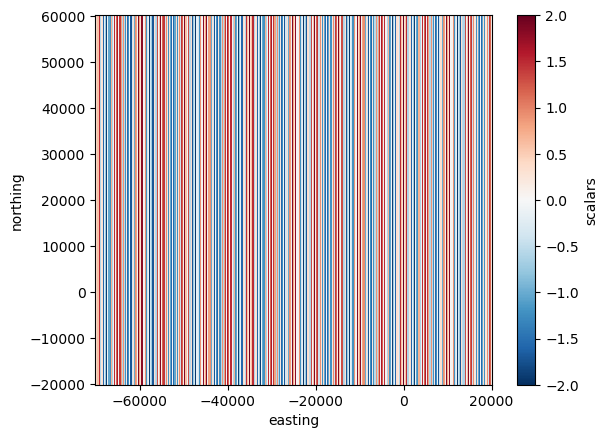

In [79]:
coordinates = vd.grid_coordinates(
    (-70e3, 20e3, -20e3, 60e3), spacing=0.25e3,
)
d = np.cos(2 * np.pi * 1 / 5e3 * coordinates[0]) #* np.cos(2 * np.pi * 1 / 50e3 * coordinates[1])
d += np.cos(2 * np.pi * 1 / 0.7e3 * coordinates[0]) #* np.cos(2 * np.pi * 1 / 5e3 * coordinates[1])
d = vd.make_xarray_grid(coordinates, d, data_names="scalars").scalars
d.plot()

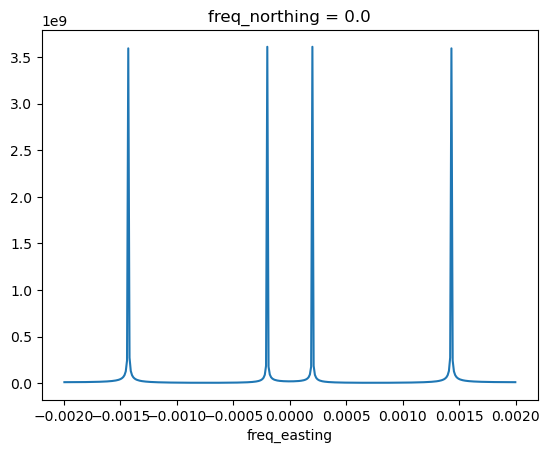

In [80]:
abs(xrft.fft(d).sel(freq_northing=0)).plot()

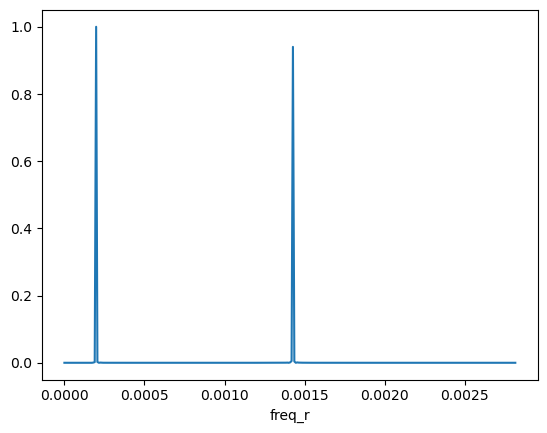

In [81]:
a = xrft.isotropic_power_spectrum(d, nfactor=1)
a = a / a.max()
a.plot()

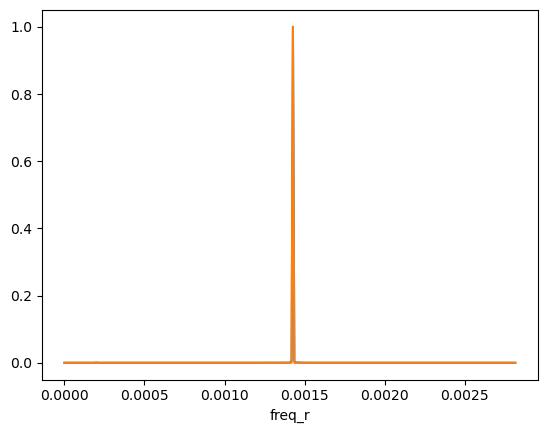

In [85]:
s =xrft.isotropic_power_spectrum(hm.gaussian_highpass(d, 1e3), nfactor=1)
(s / s.max()).plot()
t.plot()

In [86]:
t = xr.zeros_like(s)
t.loc[dict(freq_r=t.sel(freq_r=1/0.7e3, method="nearest").freq_r)] = 1
t

<xarray.DataArray (freq_r: 321)> Size: 3kB
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
Coordinates:
  * freq_r   (freq_r) float64 3kB 0.0 1.422e-05 2.448e-05 ... 0.002805 0.002816

In [91]:
np.testing.assert_allclose(s / s.max(), t, rtol=0, atol=0.01)

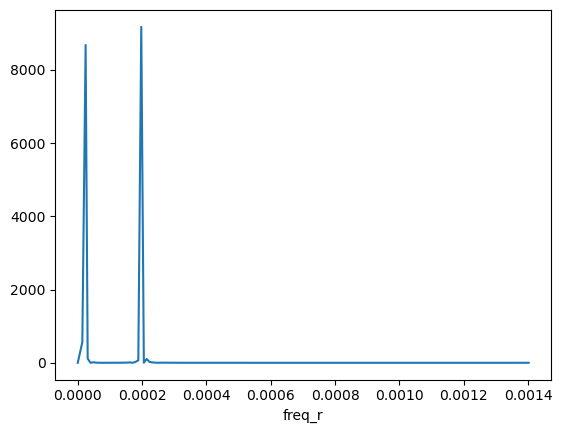

In [61]:
xrft.isotropic_power_spectrum(d, nfactor=1).plot()

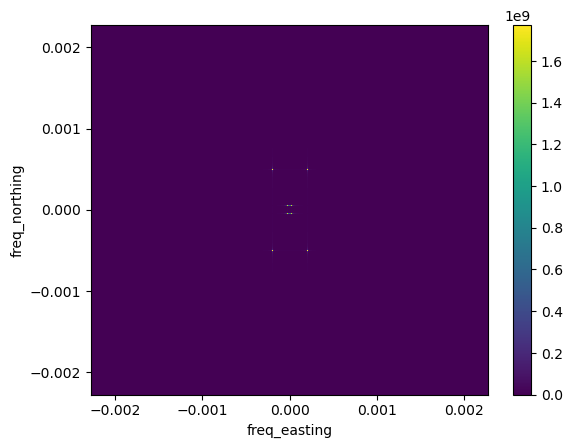

In [4]:
np.abs(xrft.fft(d)).plot()

In [ ]:
g = xr.open_dataset("harmonica/tests/data/filter.nc")
g

In [ ]:
coordinates = vd.grid_coordinates(
    (-70e3, 20e3, -20e3, 60e3), spacing=0.22e3, extra_coords=500
)
finc, fdec = -45, 13
minc, mdec = -14, -24
dipole = [-25e3, 20e3, -5000]
moment = 1e12
magnetic_field_pole = hm.dipole_magnetic(
    coordinates,
    dipoles=dipole,
    magnetic_moments=hm.magnetic_angles_to_vec(moment, 90, 0),
    field="b",
)
anomaly_pole = hm.total_field_anomaly(magnetic_field_pole, 90, 0)
magnetic_field = hm.dipole_magnetic(
    coordinates,
    dipoles=dipole,
    magnetic_moments=hm.magnetic_angles_to_vec(moment, minc, mdec),
    field="b",
)
anomaly = hm.total_field_anomaly(magnetic_field, finc, fdec)
grid = vd.make_xarray_grid(coordinates[:2], (anomaly, anomaly_pole), data_names=["anomaly", "anomaly_pole"])
anomaly_reduced = hm.reduction_to_pole(grid.anomaly, finc, fdec, minc, mdec)

In [ ]:
(anomaly_reduced - grid.anomaly_pole).plot()

In [ ]:
(1 / np.abs(grid.anomaly_pole)).plot()

In [ ]:
grid.anomaly.plot()

In [ ]:
grid.anomaly_pole.plot()

In [ ]:
anomaly_reduced.plot()